In [54]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.gridspec import GridSpec
import hickle as hkl


from InflGame.adaptive.visualization import Shell
from InflGame.utils import general as general
from InflGame.domains.simplex.simplex_utils import *
from InflGame.domains.rd import *

## Setup:The enviroment and adapative enviroment

The cell below sets up the outer shell for visualizing the the adapative enviroment. 

In [55]:
domain_bounds=simplex_setup(refinement=4)
corners=domain_bounds[1]
trimesh=domain_bounds[3]
bin_points,bin_points_xy=simplex_bin_setup(domain_bounds=domain_bounds)

In [56]:
resources_dirl=resource_distribution_choice(bin_points=bin_points,resource_type="dirichlet_distribution",resource_parameters=[.2,.2,.2])
resources_guass=resource_distribution_choice(bin_points=bin_points_xy,resource_type="multi_modal_gaussian_distribution_2D_triangle",resource_parameters=[torch.tensor([[[.1,0],[0,.1]],[[.1,0],[0,.1]],[[.1,0],[0,.1]]]),torch.tensor([[0,0],[1,0],[0.5000, 0.8660]])])

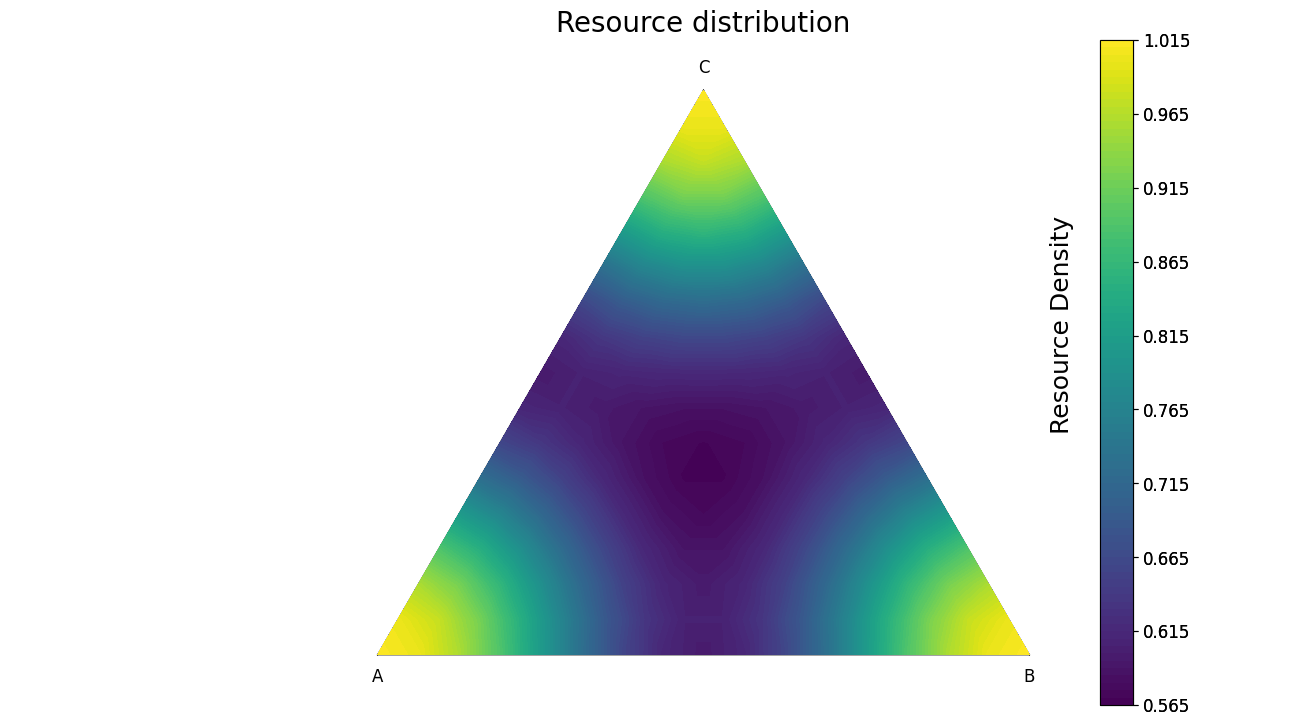

In [57]:
r2=domain_bounds[0]
triangle=domain_bounds[2]

font_size_labels=18
font_size_title=20

fig = plt.figure(figsize=(19, 7))
gs = GridSpec(nrows=1, ncols=1,width_ratios=[1],wspace=0.0, hspace=0.2, top=1, bottom=0.05, left=0.17, right=0.845)
ax0 = fig.add_subplot(gs[:, 0])
ax0.set_box_aspect(1)
ax0.triplot(triangle,linewidth=0.8,color="black")
im=ax0.tricontourf(trimesh, resources_guass,levels=100)
ax0.axis('equal')
ax0.axis('off')
margin=0.01

ax0.set_ylim(ymin=-margin,ymax=r2[1]+margin)
ax0.set_xlim(xmin=-margin,xmax=1.+margin)
ax0.annotate('A',(0,0),xytext=(-0.0,-0.02),horizontalalignment='center',va='top')
ax0.annotate('B',(1,0),xytext=(1.0,-0.02),horizontalalignment='center',va='top')
ax0.annotate('C',corners[2],xytext=corners[2]+np.array([0.0,0.02]),horizontalalignment='center',va='bottom')
plt.title('Resource distribution',fontsize=font_size_title)


ax1 = fig.add_subplot(gs[:, 0])
cbar=fig.colorbar(im,ax=ax1, extend='max',location='right',ticklocation='left')
ax1.yaxis.set_ticks_position('left')
ax1.set_box_aspect(.1)
ax1.axis('off')

ax2 = fig.add_subplot(gs[:, 0])
ax2.axis('off')
ax2.set_box_aspect(.1)
ax2.set_title('Resource Density',x=.82, y=0, rotation = 90,size=font_size_labels)



plt.colorbar(im)
fig.savefig('simplex_alpha_1.svg',bbox_inches='tight')


In [ ]:
num_agents=8
int_agents_pos=general.agent_position_setup(num_agents=num_agents,setup_type="initial_symmetric_setup",domain_type='simplex',domain_bounds=0,dimensions=3)

sig=1
parameters=torch.tensor([sig,sig,sig,sig,sig,sig,sig,sig])
resource_type="dirichlet_distribution"
resources=resources_guass

infl_configs={"infl_type":"dirichlet"}
lr_type='cosine_annealing' #static or cosine
learning_rate=[1/1000,1/1000,1000]
time_steps=1
vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos, parameters=parameters,resource_distribution=resources,
          bin_points=bin_points,infl_configs=infl_configs,learning_rate_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,
          domain_type="simplex",domain_bounds=domain_bounds,resource_type=resource_type,tolerance=10**-5)


In [59]:
vis.setup_adaptive_env()
vis.field.gradient_ascent()

og_pos_matrix=vis.field.pos_matrix.clone()
og_grad_matrix=vis.field.grad_matrix.clone()
vis.agents_pos=int_agents_pos.clone()


## End State plot

Shows the players influence over the resource distribution as they move via adaptive dynamics

C:\Users\Mark-Fu-Lab\Dartmouth College Dropbox\Mark Lovett\Mark-Fu Lab\influencer_games\src\InflGame\adaptive\grad_func_env.py:295: UserWarning: Non-positive values detected in base influence matrix this may result in unpredictable behavior
  warnings.warn("Non-positive values detected in base influence matrix this may result in unpredictable behavior", UserWarning)


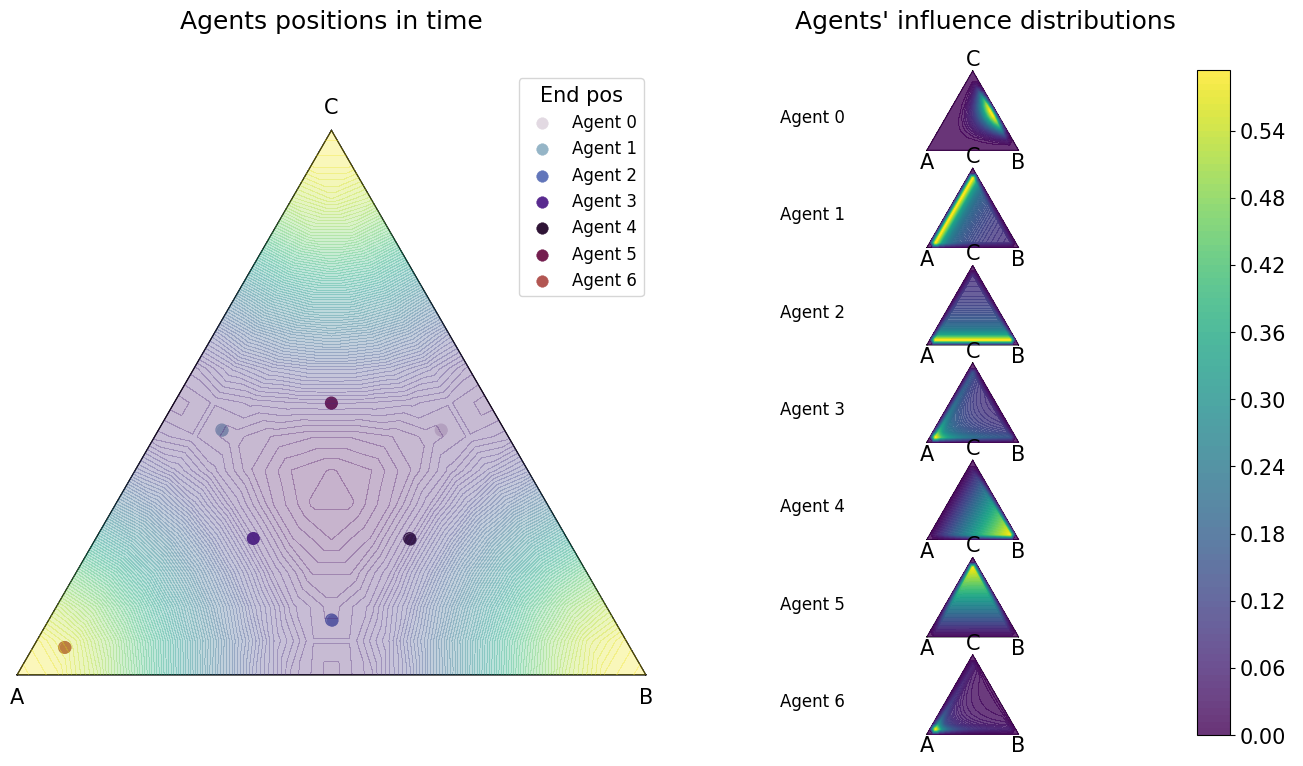

In [60]:
vis.dist_pos_gif(1)

## Gif State plot

gif of the above plot

In [61]:
#vis.dist_pos_gif(100)

ERROR:root:Parameter 0 failed: cannot pickle 'matplotlib._tri.Triangulation' object
ERROR:root:Parallel processing failed: Failed to compute parameter 0: cannot pickle 'matplotlib._tri.Triangulation' object


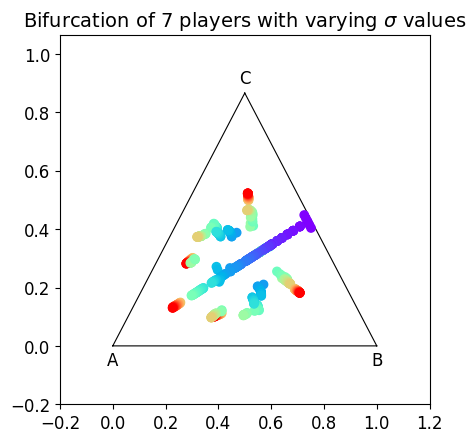

In [62]:
fig=vis.equilibrium_bifurcation_plot(reach_start=.01,
                                     reach_end=3,
                                     reach_num_points=100,
                                     time_steps=1000,
                                     initial_pos=vis.agents_pos,
                                     name_ads=[],
                                     title_ads=[],
                                     parallel_configs={'parallel':True, 'max_workers':8, 'batch_size':4},
                                     font={'default_size': 15, 'cbar_size': 16, 'title_size': 18, 'legend_size': 12, 'font_family': 'sans-serif'},
                                     save=True,
                                     paper_figure={'paper': True, 'section': '4_2','figure_id':'figure 8'})
vis.field.pos_matrix=og_pos_matrix.clone()
vis.field.grad_matrix=og_grad_matrix.clone()
fig

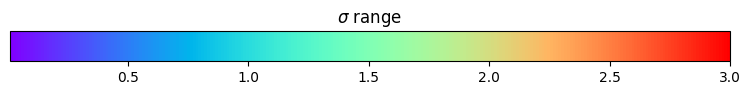

In [4]:

import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

a = np.array([[.01,3]])
pl.figure(figsize=(9, .5))
img = pl.imshow(a, cmap="rainbow")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
plt.title(r"$\sigma$ range")
pl.savefig("simplex_colorbar.svg",bbox_inches='tight')

